In [ ]:
%load_ext autoreload
%autoreload 2
%cd ..
%pwd

import torch

# device = torch.device("cpu")

device = torch.device("cuda")

[ 2.92998050e-01  5.00000000e-01  1.64046099e-01  6.01393767e-18
 -3.28026605e-03]
[0.29296875 0.49609375 0.16015625 0.         0.        ]
[ 0.2734375   0.5         0.17578125  0.         -0.00390625]


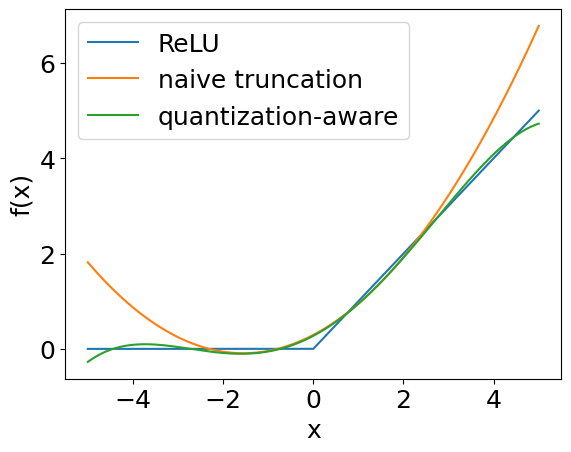

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PolyRelu import real_relu, generate_coeffs

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 18})

def generate_coeffs_non_quantized(activation_func, degree, rng, granularity=1e-3):
    steps = int(2 * rng / granularity)
    xs = np.linspace(-rng, rng, steps)
    ys = activation_func(xs)
    coeffs = np.polyfit(xs, ys, deg=degree)[::-1]
    return coeffs


def compute_poly(coeffs, degree, x):
    out = 0
    for i in range(degree + 1):
        out = out + coeffs[i] * x**i
    return out


rng = 5
xs = np.linspace(-rng, rng, int(2 * rng / 1e-3))
precision = 8
CRYPTO_PRECISION = precision
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xs, np.maximum(0, xs), label='ReLU')
coeffs = generate_coeffs_non_quantized(real_relu, degree=4, rng=5)

print(coeffs)
trunc = np.divide(np.trunc(np.multiply(coeffs, 2 ** CRYPTO_PRECISION)).astype(int),
                                         2 ** CRYPTO_PRECISION)

print(trunc)
plt.plot(xs, [compute_poly(trunc, 4, x) for x in xs], label='naive truncation')

coeffs = generate_coeffs(real_relu, degree=4, file_prefix="./poly_coefs", rng=rng, quantized_coef=True)
print(coeffs)
plt.plot(xs, [compute_poly(coeffs, 4, x) for x in xs], label="quantization-aware")
plt.legend()
plt.savefig("figure_4.pdf", bbox_inches='tight')
